In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of samples
n = 100

# Covariates
covariates = pd.DataFrame({
    'Covariate1': np.random.normal(0, 1, n),
    'Covariate2': np.random.uniform(0, 1, n)
})

# Right censoring example data
right_censored_threshold = 5
right_censored_data = np.random.uniform(0, right_censored_threshold, n)
right_censoring_indicator = right_censored_data < right_censored_threshold

right_censored_df = pd.DataFrame({
    'CensoredValue': right_censored_data,
    'Censored': right_censoring_indicator
})

# Left censoring example data
left_censored_threshold = -5
left_censored_data = np.random.uniform(left_censored_threshold, 0, n)
left_censoring_indicator = left_censored_data > left_censored_threshold

left_censored_df = pd.DataFrame({
    'CensoredValue': left_censored_data,
    'Censored': left_censoring_indicator
})

# Interval censoring example data
interval_censored_data = np.random.uniform(-2, 2, n)
interval_censoring_indicator = np.random.choice([0, 1], n)

interval_censored_df = pd.DataFrame({
    'CensoredValue': interval_censored_data,
    'Censored': interval_censoring_indicator
})

# Combine dataframes
right_censored_df['Type'] = 'Right Censored'
left_censored_df['Type'] = 'Left Censored'
interval_censored_df['Type'] = 'Interval Censored'

data = pd.concat([right_censored_df, left_censored_df, interval_censored_df])

# Merge with covariates
data = pd.concat([data, covariates], axis=1)

print(data.head())


   CensoredValue  Censored            Type  Covariate1  Covariate2
0       3.974057         1  Right Censored    0.496714    0.417411
1       2.513185         1  Right Censored   -0.138264    0.222108
2       2.884519         1  Right Censored    0.647689    0.119865
3       2.462588         1  Right Censored    1.523030    0.337615
4       0.976215         1  Right Censored   -0.234153    0.942910


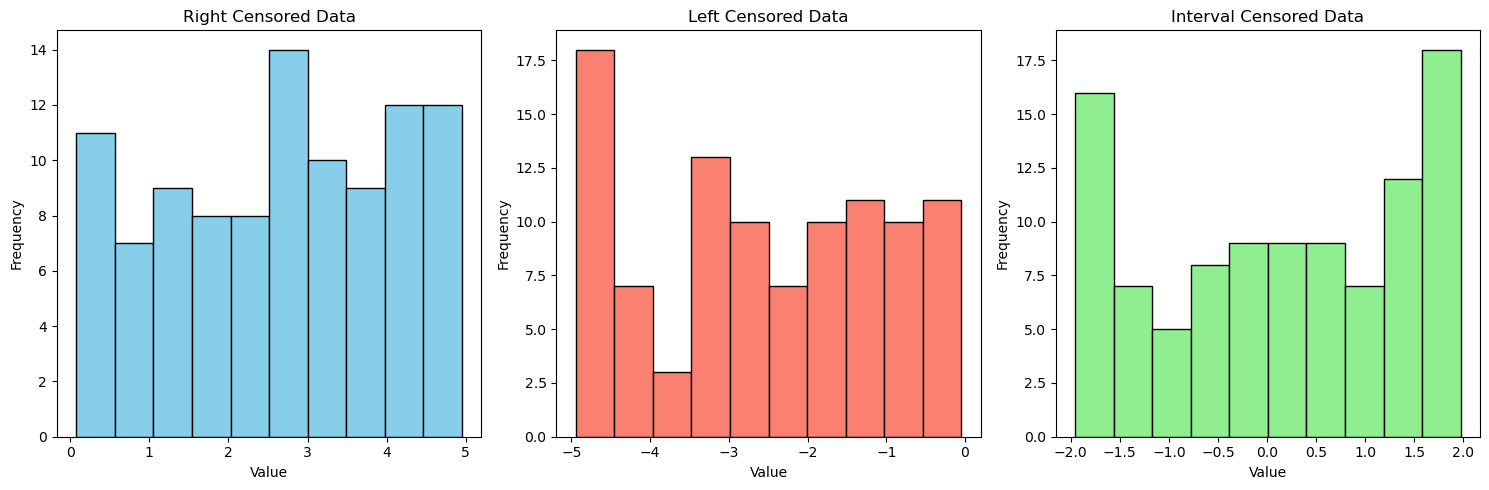

In [3]:
import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Right censoring plot
axs[0].hist(data[data['Type'] == 'Right Censored']['CensoredValue'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Right Censored Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Left censoring plot
axs[1].hist(data[data['Type'] == 'Left Censored']['CensoredValue'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Left Censored Data')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Interval censoring plot
axs[2].hist(data[data['Type'] == 'Interval Censored']['CensoredValue'], bins=10, color='lightgreen', edgecolor='black')
axs[2].set_title('Interval Censored Data')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [103]:
df = pd.read_csv('left_censored.csv')
X = df[['X1','X2']]
X = sm.add_constant(X)
y = df['Y']

In [105]:
#OLS 
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     119.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           6.90e-27
Time:                        11:54:34   Log-Likelihood:                -136.59
No. Observations:                 100   AIC:                             279.2
Df Residuals:                      97   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1782      0.097     12.145      0.0

In [31]:
#OLS 
tobit_model = sm.OLS(y, X).fit(censored='left', left=censoring_threshold)
print(tobit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     119.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           6.90e-27
Time:                        11:25:31   Log-Likelihood:                -136.59
No. Observations:                 100   AIC:                             279.2
Df Residuals:                      97   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1782      0.097     12.145      0.0

In [7]:
#Tobit regression
tobit_model = sm.OLS(data['Y'], data[['X1', 'X2']]).fit(censored='left', left=censoring_threshold)
print(tobit_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.515
Method:                 Least Squares   F-statistic:                              54.02
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    1.54e-16
Time:                        11:17:37   Log-Likelihood:                         -182.81
No. Observations:                 100   AIC:                                      369.6
Df Residuals:                      98   BIC:                                      374.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [115]:
df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/tobit.csv')
df

,id,read,math,prog,apt
0,1,34,40,vocational,352
1,2,39,33,vocational,449
2,3,63,48,general,648
3,4,44,41,general,501
4,5,47,43,general,762
...,...,...,...,...,...
195,196,44,49,general,539
196,197,50,50,general,594
197,198,47,51,general,616
198,199,52,50,general,558


In [131]:
df = pd.get_dummies(df, dtype=int)
df.to_csv('right_censored.csv', index=False)
X = df[['read','math','prog_general','prog_vocational']]
X = sm.add_constant(X)
y = df['apt']

(array([ 1.,  4.,  9., 15., 21., 36., 35., 29., 17., 33.]),
 array([352. , 396.8, 441.6, 486.4, 531.2, 576. , 620.8, 665.6, 710.4,
        755.2, 800. ]),
 <BarContainer object of 10 artists>)

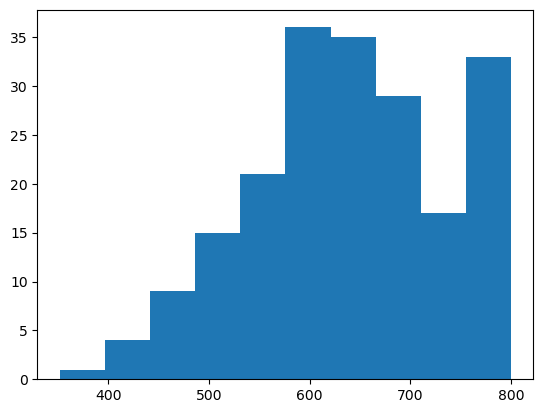

In [121]:
#Dependent variable is right censored - Max value is >=800, the lowest value possible for the highest category
plt.hist(df['apt'])

In [135]:
sm.OLS(y,X).fit().summary()

from linearmodels import Tobit


ImportError: cannot import name 'Tobit' from 'linearmodels' (/opt/anaconda3/lib/python3.11/site-packages/linearmodels/__init__.py)

In [129]:
#Tobit Model for Right Censored Data
sm.OLS(y,X).fit(cens='left', right=400).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    apt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     77.13
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           4.14e-39
Time:                        11:57:11   Log-Likelihood:                -1107.9
No. Observations:                 200   AIC:                             2226.
Df Residuals:                     195   BIC:                             2242.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             242.7354     30.140      8.054      0.000     183.294     302.177
read                2.5527      0.583      4.379      0.000       1.403       3.702
math                5.3832      0.659      8.169      0.000       4.083       6.683
prog_general      -13.7406     11.744     -1.170      0.243     -36.902       9.421
prog_vocational   -48.8347     12.982     -3.762      0.000     -74.437     -23.233
==============================================================================
Omnibus:                        0.116   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.216
Skew:                           0.050   Prob(JB):                        0.898
Kurtosis:                       2.874   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""